In [1]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import mplfinance as mpf


In [3]:
def extract_historical_data(symbol):
    try:
        # Get historical data using yfinance
        stock = yf.Ticker(symbol)
        data = stock.history(period="1y")
        dfdata=pd.DataFrame(data).head
        print(dfdata)
        return data
    except Exception as e:
        print("An error occurred during data extraction:", str(e))

symbol = 'AAPL'
    # Step 1: Data Extraction
data = extract_historical_data(symbol)

<bound method NDFrame.head of                                  Open        High         Low       Close  \
Date                                                                        
2022-06-24 00:00:00-04:00  139.069560  141.067638  138.940342  140.819122   
2022-06-27 00:00:00-04:00  141.852942  142.638261  140.133216  140.819122   
2022-06-28 00:00:00-04:00  141.286355  142.568691  136.504908  136.624191   
2022-06-29 00:00:00-04:00  136.644067  139.835004  135.858747  138.403549   
2022-06-30 00:00:00-04:00  136.435315  137.548662  132.975976  135.908463   
...                               ...         ...         ...         ...   
2023-06-16 00:00:00-04:00  186.729996  186.990005  184.270004  184.919998   
2023-06-20 00:00:00-04:00  184.410004  186.100006  184.410004  185.009995   
2023-06-21 00:00:00-04:00  184.899994  185.410004  182.589996  183.960007   
2023-06-22 00:00:00-04:00  183.740005  187.050003  183.669998  187.000000   
2023-06-23 00:00:00-04:00  185.550003  187.559

In [4]:
def calculate_average_volume(data):
    try:
        # Calculate average daily trading volume
        average_volume = data['Volume'].mean()
        return average_volume
    except Exception as e:
        print("An error occurred during data processing:", str(e))

if data is not None:
        average_volume = calculate_average_volume(data)
        print("Average daily trading volume:", average_volume)

Average daily trading volume: 72645627.49003984


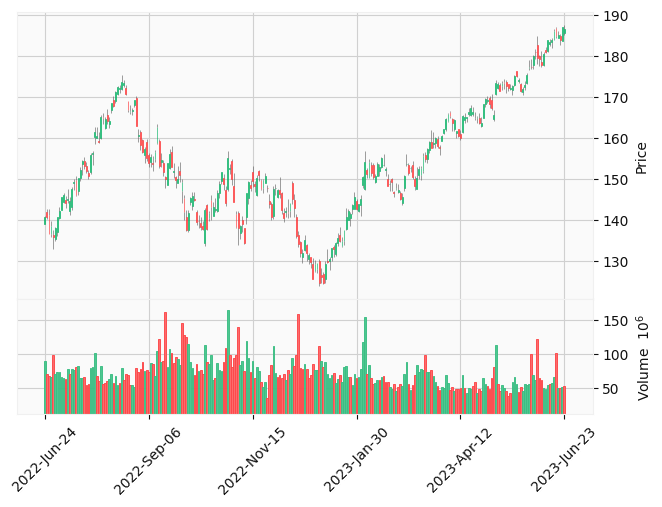

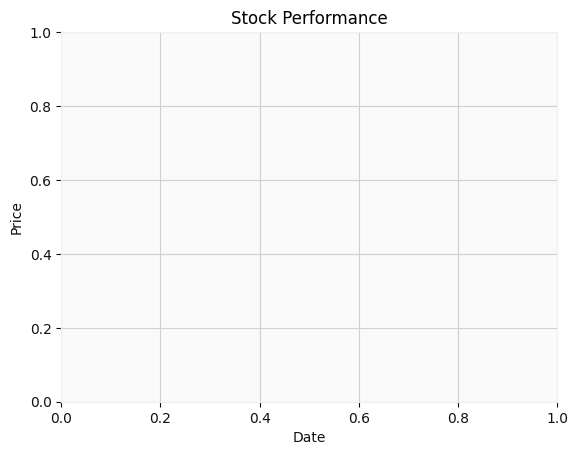

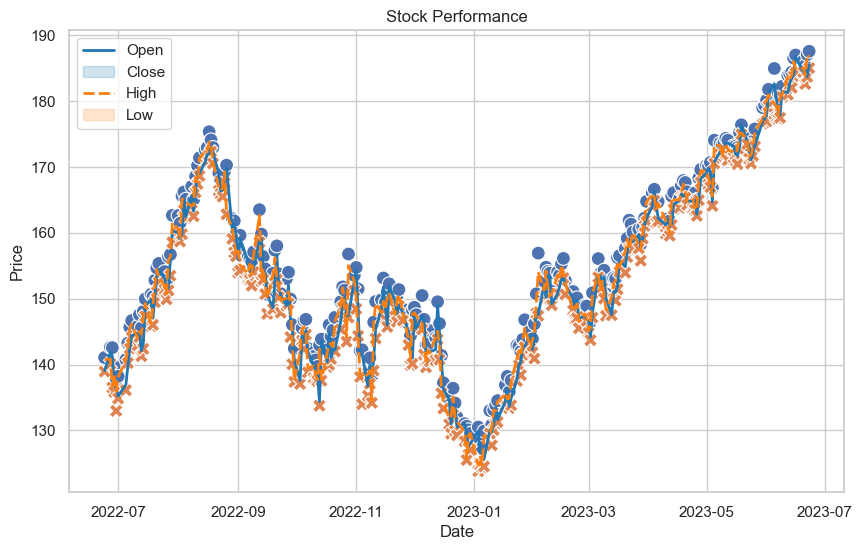

In [6]:
def visualize_stock_performance(data):
    try:
        # Create candlestick chart using Plotly
        fig = go.Figure(data=[go.Candlestick(x=data.index,
                                             open=data['Open'],
                                             high=data['High'],
                                             low=data['Low'],
                                             close=data['Close'])])
        fig.update_layout(title='Stock Performance',
                          xaxis_title='Date',
                          yaxis_title='Price')
        fig.show()
    except Exception as e:
        print("An error occurred during data visualization:", str(e))

    try:
        # Create candlestick chart using mplfinance
        mpf.plot(data, type='candle', volume=True, style='yahoo')
        plt.title('Stock Performance')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()
    except Exception as e:
        print("An error occurred during data visualization:", str(e))

    try:
        # Create candlestick chart using seaborn
        plt.figure(figsize=(10, 6))
        sns.set(style='whitegrid')
        sns.lineplot(data=data[['Open', 'Close']], palette='tab10', linewidth=2)
        sns.scatterplot(data=data[['High', 'Low']], color='black', marker='o', s=100)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Stock Performance')
        plt.legend(['Open', 'Close', 'High', 'Low'])
        plt.show()
    except Exception as e:
        print("An error occurred during data visualization:", str(e))


visualize_stock_performance(data)